In [3]:
# Using the Diabetes dataset in scikit-learn, use the inbuilt LinearRegression() function on it to  create a prediction model. Report the mean squared error and the r2 coefficient. Plot the obtained regression line on a scatter plot of the original data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [40]:
# show data as tables with pandas
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [41]:
# Use only one feature, the BMI
diabetes_X = diabetes.data[:, np.newaxis, 2]
data1= pd.DataFrame(diabetes_X, columns=['BMI'])
data1.head()

,BMI
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [43]:
# Use only one feature, the BMI(Body Mass Index)
diabetes_X = diabetes.data[:, np.newaxis, 2]
data1= pd.DataFrame(diabetes_X, columns=['feature'])
data1.head()

# Split the data into training/testing sets with 80% training and 20% testing
diabetes_X_train = diabetes_X[:354]
diabetes_X_test = diabetes_X[354:]
print(diabetes_X_train.shape)

# Split the targets into training/testing sets with 80% training and 20% testing
diabetes_y_train = diabetes.target[:354]
diabetes_y_test = diabetes.target[354:]

print(diabetes_X_test.shape)

# Create linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

(354, 1)
(88, 1)


Coefficients: 
 [957.00838948]
Mean squared error: 4124.82
Variance score: 0.36


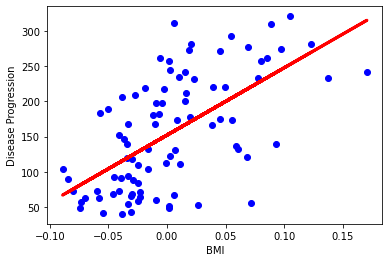

In [35]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
        % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

# show x and y labels
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()